In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.axes import Axes
from sklearn.model_selection import train_test_split

In [70]:
plt.rcParams["figure.figsize"] = (18, 7)
sns.set_theme()

% matplotlib inline

In [71]:
mvid = pd.read_csv('data/MVID_101001_171001.txt')
sber = pd.read_csv('data/SBER_101001_171001.txt')

In [72]:
df = pd.merge(sber, mvid, on='<DATE>')
df.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


In [73]:
df.shape

(1758, 11)

In [74]:
X = df['<CLOSE>_x']
y = df['<CLOSE>_y']

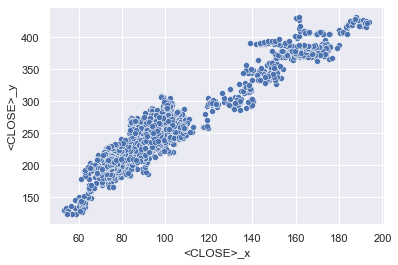

In [75]:
_ = sns.scatterplot(x=x, y=y)

In [49]:
class Hypothesis:

    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):
        return np.sum((self.predict(X) - Y) ** 2) / (2 * len(X))

    def BGD(self, X, Y, alpha=0.00005):
        dJ0 = np.sum(self.predict(X) - Y) / len(X)
        dJ1 = np.sum((self.predict(X) - Y) * X) / len(X)

        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [50]:
reg = Hypothesis()
print(reg.predict(0))
print(reg.predict(100))
print(reg.error(x, y))

0
0
36271.583448890786


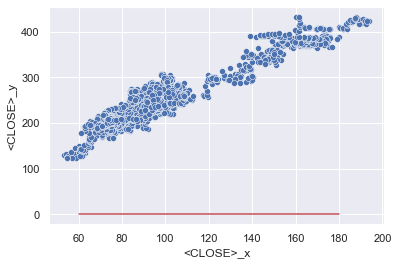

In [51]:

X0 = np.linspace(60, 180, 100)
Y0 = reg.predict(X0)
ax: Axes = sns.scatterplot(x=x, y=y)
ax.plot(X0, Y0, color='r')

In [52]:
reg.BGD(x, y)
print(reg.error(x, y))

6734.135540194964


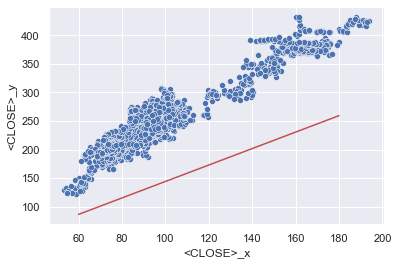

In [53]:
X0 = np.linspace(60, 180, 100)
Y0 = reg.predict(X0)

ax: Axes = sns.scatterplot(x=x, y=y)
ax.plot(X0, Y0, color='r')

In [60]:
class Hypothesis1(Hypothesis):
    def BGD(self, X, Y, alpha=0.000005, accuracy=0.0001, max_steps=5000):
        steps, errors = [], []
        step = 0
        new_err = self.error(X, Y) - 1
        dJ = 1
        while dJ > accuracy and step < max_steps:
            dJ0 = np.sum(self.predict(X) - Y) / len(X)
            dJ1 = np.sum((self.predict(X) - Y) * X) / len(X)

            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            old_err = new_err
            new_err = self.error(X, Y)

            dJ = np.abs(old_err - new_err)
            print(f'{step=}, {dJ=:.4f}')
            step += 1
            steps.append(step)
            errors.append(new_err)

        return steps, errors

In [61]:
reg = Hypothesis1()
steps, errors = reg.BGD(x, y)
J = reg.error(x, y)
print(J)

step=0, dJ=4030.7644
step=1, dJ=3579.8928
step=2, dJ=3178.6660
step=3, dJ=2822.4078
step=4, dJ=2506.0783
step=5, dJ=2225.2024
step=6, dJ=1975.8064
step=7, dJ=1754.3622
step=8, dJ=1557.7370
step=9, dJ=1383.1491
step=10, dJ=1228.1287
step=11, dJ=1090.4827
step=12, dJ=968.2637
step=13, dJ=859.7427
step=14, dJ=763.3846
step=15, dJ=677.8261
step=16, dJ=601.8568
step=17, dJ=534.4020
step=18, dJ=474.5073
step=19, dJ=421.3256
step=20, dJ=374.1043
step=21, dJ=332.1755
step=22, dJ=294.9460
step=23, dJ=261.8891
step=24, dJ=232.5371
step=25, dJ=206.4748
step=26, dJ=183.3336
step=27, dJ=162.7860
step=28, dJ=144.5413
step=29, dJ=128.3414
step=30, dJ=113.9572
step=31, dJ=101.1851
step=32, dJ=89.8445
step=33, dJ=79.7749
step=34, dJ=70.8339
step=35, dJ=62.8950
step=36, dJ=55.8459
step=37, dJ=49.5868
step=38, dJ=44.0292
step=39, dJ=39.0945
step=40, dJ=34.7129
step=41, dJ=30.8224
step=42, dJ=27.3679
step=43, dJ=24.3006
step=44, dJ=21.5770
step=45, dJ=19.1587
step=46, dJ=17.0115
step=47, dJ=15.1049
step=4

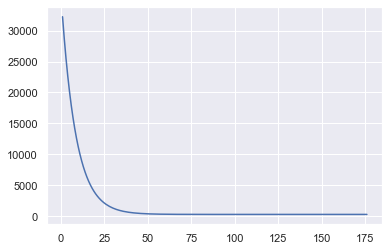

In [66]:
_ = plt.plot(steps, errors)

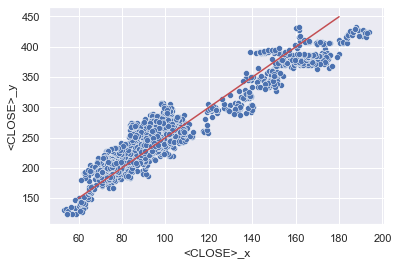

In [67]:
X0 = np.linspace(60, 180, 100)
Y0 = reg.predict(X0)

ax: Axes = sns.scatterplot(x=x, y=y)
_ = ax.plot(X0, Y0, color='r')

In [ ]:
class Hypothesis2:

    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def fit(self, X, y):
        pass

    def predict(self, X):
        return self.b0 + self.b1 * X

    def mse(self, X, y):
        return np.sum((self.predict(X) - y) ** 2) / len(X)

    @classmethod
    def train_test_split(cls, X, y, test_size=None, train_size=None, random_state=None, shuffle=None):
        return train_test_split(
            X, y,
            test_size=test_size,
            train_size=train_size,
            random_state=random_state,
            shuffle=shuffle
        )


In [ ]:
X_train, X_test, y_train, y_test = Hypothesis2.train_test_split(X, y, train_size=0.8)